In [1]:
# Problem Statement : Predict the salary of the employee using the features provided in the data.

In [2]:
# First of all import all the required libraries like pandas, numpy, seaborn, sklearn, matplotlib etc. And load the data (Salaries.csv file) from GITHUB link (https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv) to train the model and test the model and show the top five rows of  employee data. Data stores two features: YearExperience and Salary. Take the year of experience as an input feature and the salary feature as an output

In [3]:
# Import Required Libraries/Datasets

In [7]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [11]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
# Here size of dataset is 397 rows and 6 columns and the target variable is salary which shows continous data hence this is regression problem

In [12]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [10]:
df.shape

(397, 6)

In [13]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [13]:
# Performing EDA # Checking Null Values in Dataframe

In [14]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [15]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [17]:
# since there are no null values present in dataset, we can proceed

In [18]:
# Checking the datatypes of columns

In [16]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [28]:
#

In [18]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [31]:
# Here we can see that output has came only for the continous database and not for String values present in the database. we will use encoding technique to convert the string values present in the dataframe to numeric values before applying any technique or building model.

In [ ]:
# Making Dataframe for Nominal Data

In [19]:
df_visualization_nominal=df[['rank','discipline','sex']].copy()

In [20]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

In [36]:
# Visualization of the Data

In [21]:
import seaborn as sns

In [38]:
# for the nominal categorical data we will use countplot as it will give the frequency of the classes of the column

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


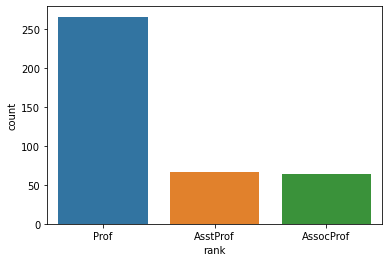

In [22]:
ax = sns.countplot(x='rank', data=df_visualization_nominal)
print(df_visualization_nominal['rank'].value_counts())

In [40]:
# From the above observation the total number of employee in rank of Prof is 266, Asst Prof is 67 and Assoc Prof is 64.

B    216
A    181
Name: discipline, dtype: int64


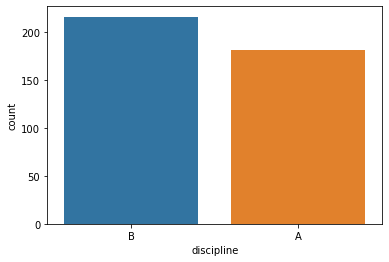

In [23]:
ax = sns.countplot(x='discipline', data=df_visualization_nominal)
print(df_visualization_nominal['discipline'].value_counts())

In [49]:
# From the above observation the total number of employee in decipline A is 181 and Total Number of employee in decipline B is 216

Male      358
Female     39
Name: sex, dtype: int64


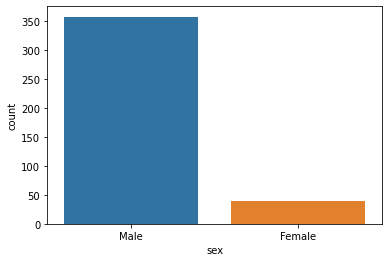

In [24]:
ax = sns.countplot(x='sex', data=df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

In [28]:
# From the above observation the total number of Male is 358 and Total Number of Female is 39 in dataset

In [ ]:
# For continuous data categories we will use distplot as it will give the flow of the line of the classes of the columns

In [53]:
# Making Dataframe for continous data

In [25]:
df_visualization_continuous=df[['yrs.since.phd','yrs.service','salary']].copy()

In [26]:
df_visualization_continuous.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

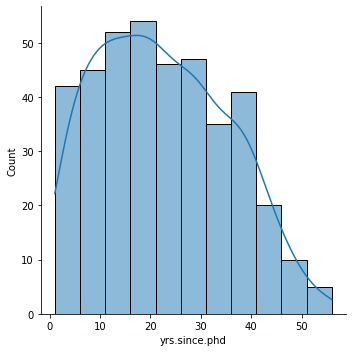

In [27]:
sns.displot(df_visualization_continuous['yrs.since.phd'], kde=True)

In [43]:
# Distribution of data shows that most of the values are present at the zero and its spreaded towards 50

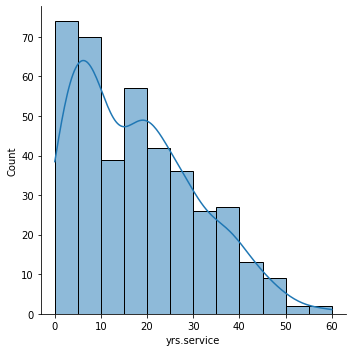

In [28]:
sns.displot(df_visualization_continuous['yrs.service'], kde=True)

In [49]:
# Distribution of data shows that most of the values are present at the zero and its spreaded towards 60

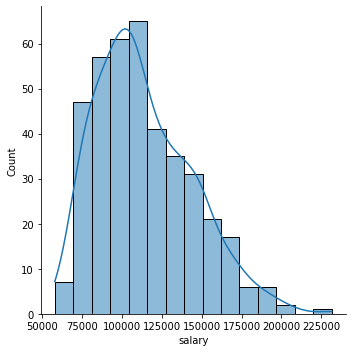

In [29]:
sns.displot(df_visualization_continuous['salary'], kde=True)

In [69]:
# Distribution of data shows that most of the values are present at 50000 and its spreaded towards 225000

In [70]:
# Since the dataset has lots of string values we will use the encoding techniques to convert the string data to numeric one.
# Since string values are not understood by machine, it is very important to perform encoding to convert string data into numeric values before applying any technique and building any any Model

In [71]:
# Encodinhg of Dataframe: importing OrdinalEncoder for encoding dataframe

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
# here we are using for loop and in df.columns we can apply the OrdinalEncoder. for i in df.columns will print the name of columns and if at any point if the data type of the column is object, it will convert the string value to numeric value.

In [32]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [76]:
# Now we will Describe the dataset

In [33]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [78]:
# from above observation, we can see the count,mean,standard deviation,minimum value, first quartile value(25%),second quartile value(50%),third quartile value(75%) and maximum value for the different variables.

In [79]:
# Now we will use heatmap for describe function

<AxesSubplot:>

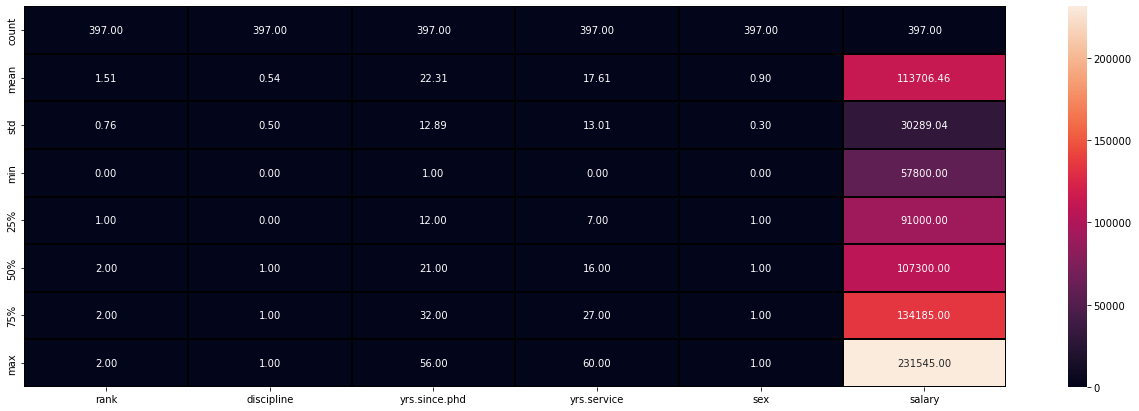

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black", fmt="0.2f")

In [84]:
# We have use heatmap on describe function, here figsize is the dimensions of the map.
# annot=True is used to display the values in map, if we use annot=False then only color will be printed without values.
# linewidths are used for changing the width of the line
# fmt="0.2f" means we are allowing only two values after the decimal points.
# linecolor="black" is used to choose the color of lines.

In [85]:
# Now we will use Corelation of the columns with the target columns

In [35]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

In [88]:
# here the target variable is salary which is highly positive corelated with the features as per analysis.Its highly corelated with Target variable and independent feature.

In [89]:
# Now we will use heatmap for coorelation

<AxesSubplot:>

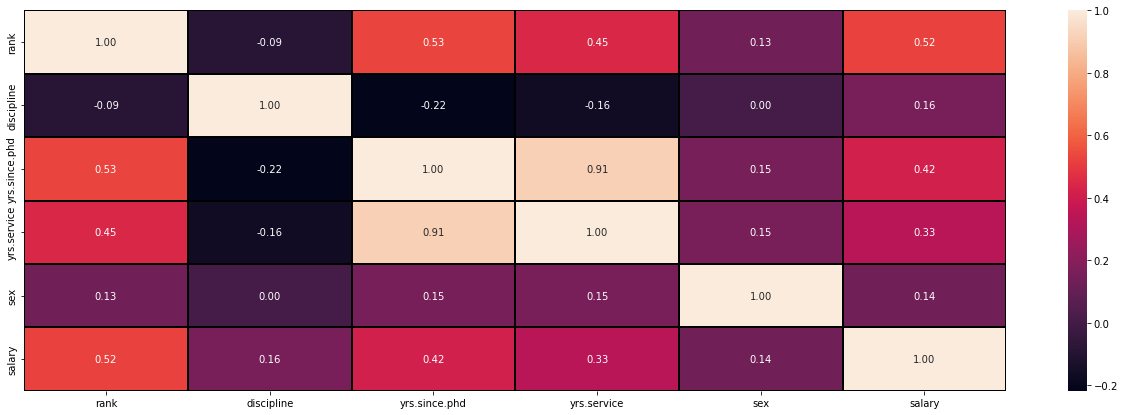

In [36]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black", fmt="0.2f")

In [91]:
# We have used the heatmap on corelation method. Here we can check the corelation values amoung the columns where the X Axis and Y Axis intersecting each other is corelation value. 
# There are two types of corelation we check here, i.e corelation between independent variable and target variable and second is corelation between independent vatiable vs second independent variable.
# if any feature is highly positive or negative corelated with target variable, it means that variable is very important and effecting in some way in predection.
# If one independent variable is highly corelated with another dependent variable it means its very important feature and can not be dropped.

In [92]:
# here we are checking the columns which are positively and negatively corelated with the target columns.

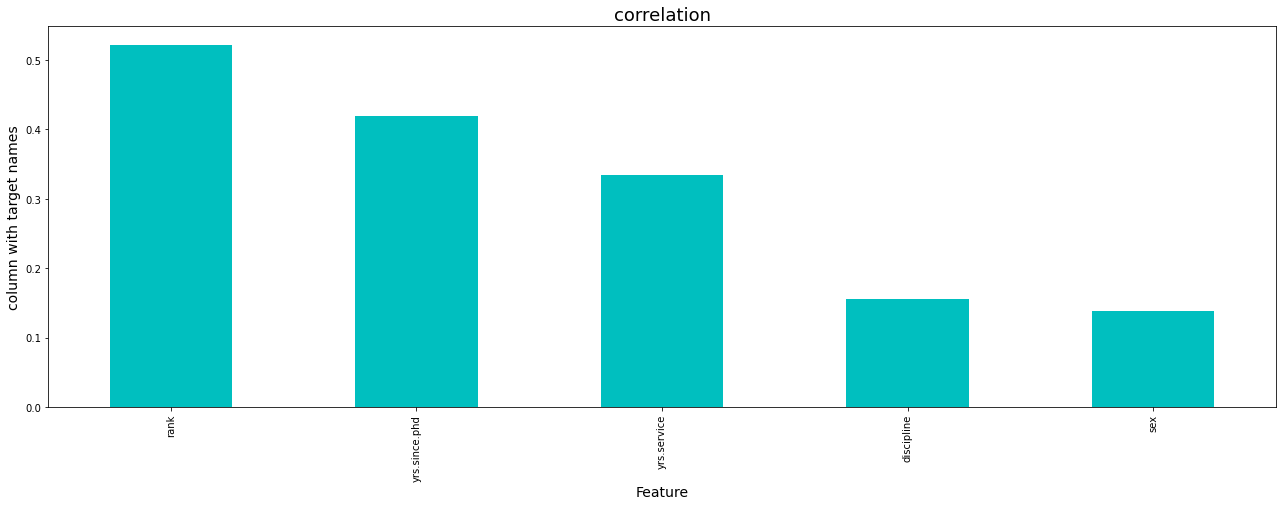

In [37]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [94]:
# From above observation we can see the positive correlation with features and target variables.

In [38]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [100]:
# Keeping +/-0.5 as the range of skewnwss, here are the columns which does not lie within the range
# rank (Categorical data)
# yrs.service (continous data)
#sex (categorical data)
# salary (target variable)

In [101]:
# Hence we will not remove skewness from categorical data

In [102]:
# Outliers Check and checking datatypes

In [39]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [ ]:
# Checking the outliers on the intiger and float types of columns using boxplot

<AxesSubplot:>

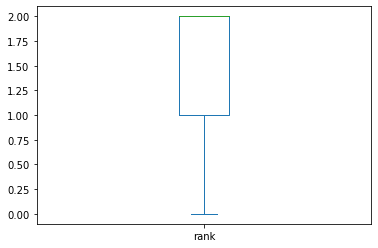

In [40]:
df['rank'].plot.box()

In [114]:
# from the above observation there is no outlier present for rank column

<AxesSubplot:>

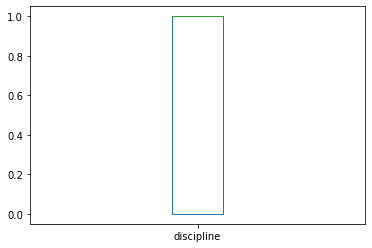

In [41]:
df['discipline'].plot.box()

In [116]:
# from the above observation there is no outlier present for discipline column

<AxesSubplot:>

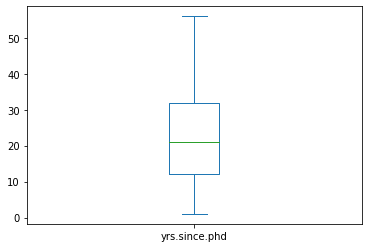

In [117]:
df['yrs.since.phd'].plot.box()

In [118]:
# from the above observation there is no outlier present for yrs.since.phd column

<AxesSubplot:>

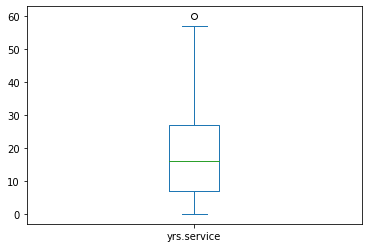

In [42]:
df['yrs.service'].plot.box()

In [120]:
# from the above observation there is one outlier present in yrs.service column and since it is neither categorical nor target variable, we need to remove the outlier.

<AxesSubplot:>

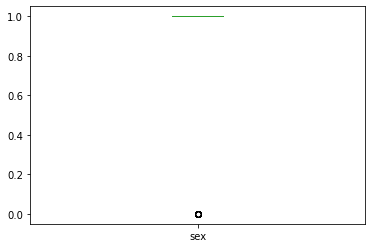

In [43]:
df['sex'].plot.box()

In [122]:
# from the above observation there is one outlier present in sex column and since it is categorical data we will not remove this outlier 

<AxesSubplot:>

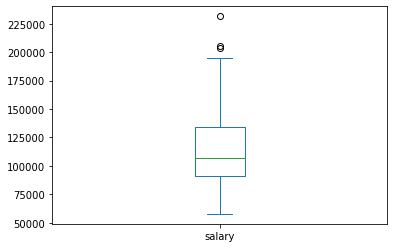

In [123]:
df['salary'].plot.box()

In [124]:
# from the above observation there are two outlier present in salary column and since it is target variable data we will not remove this outlier as target variable can contain any data.

In [45]:
df['yrs.service'].unique()

array([18, 16,  3, 39, 41,  6, 23, 45, 20,  8,  2,  1,  0, 34, 36, 26, 31,
       30, 19,  4,  9, 21, 27, 38, 15, 28, 25, 11,  5, 12, 17, 14, 37,  7,
       10, 29, 32, 22, 49, 57, 24, 53, 33, 40, 35, 43, 44, 48, 46, 51, 13,
       60], dtype=int64)

In [46]:
df['sex'].unique()

array([1., 0.])

In [ ]:
# since sex column is nominal type, we can not consider its data point as outlier

In [47]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [129]:
#

In [130]:
# Considering Outliers Removal

In [48]:
df.shape

(397, 6)

In [49]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [133]:
#

In [50]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [51]:
df_new_z.shape

(354, 6)

In [ ]:
# percentage loss of data

In [52]:
Data_loss=((397-354)/397)*100

In [53]:
Data_loss

10.831234256926953

In [143]:
#

In [144]:
# Seperating the data columns into features and target

In [54]:
features=df.drop('salary',axis=1)
target=df['salary']

In [146]:
# now we will use scalling technique for scaling the data using Min-Max Scaler

In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.3611999954853077
At random state 0,the testing accuracy is:- 0.4079258314975236


At random state 1,the training accuracy is:- 0.3604245854198438
At random state 1,the testing accuracy is:- 0.41633641876629457


At random state 2,the training accuracy is:- 0.37547390964955596
At random state 2,the testing accuracy is:- 0.3600189554526694


At random state 3,the training accuracy is:- 0.3847313825130595
At random state 3,the testing accuracy is:- 0.3293529875010861


At random state 4,the training accuracy is:- 0.38517450334380465
At random state 4,the testing accuracy is:- 0.304400813331562


At random state 5,the training accuracy is:- 0.3950033630150771
At random state 5,the testing accuracy is:- 0.2752907752774737


At random state 6,the training accuracy is:- 0.3650308031752799
At random state 6,the testing accuracy is:- 0.40189870806075667


At random state 7,the training accuracy is:- 0.3575963886324032
At random state 7,the testing 

In [58]:
# Here we are selecting random state 39 being giving highest accuracy among the data.

In [60]:
#Splitting the data with Random state 39

In [62]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=39)

In [63]:
# Train the Model and fitting the model on training data

In [64]:
lr.fit(features_train,target_train)

LinearRegression()

In [65]:
# Using Ptredict function for making thr prediction on test data

In [66]:
pred_test=lr.predict(features_test)

In [67]:
print(r2_score(target_test,pred_test))

0.3718833413484989


In [68]:
#

In [70]:
# Cross-Validation of the Model

In [71]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

In [72]:
from sklearn.model_selection import cross_val_score

In [75]:
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is <built-in method mean of numpy.ndarray object at 0x000001E93C008030> and accuracy score for training is -0.4231558655921881 and accuracy for testing is 0.3718833413484989


At cross fold 3 the cv score is <built-in method mean of numpy.ndarray object at 0x000001E93C008930> and accuracy score for training is -0.4231558655921881 and accuracy for testing is 0.3718833413484989


At cross fold 4 the cv score is <built-in method mean of numpy.ndarray object at 0x000001E93C008ED0> and accuracy score for training is -0.4231558655921881 and accuracy for testing is 0.3718833413484989


At cross fold 5 the cv score is <built-in method mean of numpy.ndarray object at 0x000001E93C008E70> and accuracy score for training is -0.4231558655921881 and accuracy for testing is 0.3718833413484989


At cross fold 6 the cv score is <built-in method mean of numpy.ndarray object at 0x000001E93C01E690> and accuracy score for training is -0.4231558655921881 and accuracy for testing

In [76]:
# Here we can see that the number of folds dont have such impact on the accuracy and cv_score. So cv=1 is selected.

In [77]:
# Here we have handeled the problem of overfitting and underfitting by checking the training and test score.

In [78]:
# we will use scatter plot where X label is Actual Salary and Y Label is Predicted Salary

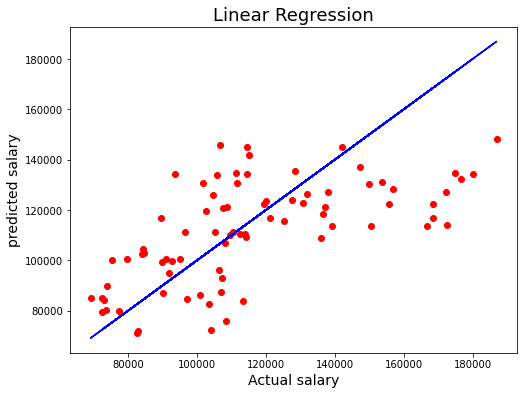

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual salary',fontsize=14)
plt.ylabel('predicted salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

In [81]:
# Best fit line is not covering the most of datapoints which shows not a good fit of model

In [82]:
# Using REGULARIZATION METHOD: LASSO

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Using LASSO Method

In [86]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],
             'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [87]:
# Best parameters extracted from LASSO model is there which can increase the performance of Model.
# Here we used GridSearchCV method under LASSO method which is hyperparameter tuning model and hyperparameter tuning model is used to check the performance of the model
# GridSearchCV method is used to take the combination of parameters and out of that combinations it will select the best combinations that will maximise the performance of the model.
# Here the Parameters are alpha and in alpha we have list of values and in random state we have taken values in the range of 1 to 10.
# then in GridSearchCV we have given the model name and after taht we are fitting the training data into model and then after that we are checking the best parameters
# we need to consider the best extracted model and train the model with these parameters.
# from this extracted output {'alpha': 10, 'random_state': 0} ,the performance of LASSO model will increse.

In [88]:
# Final Model Training

In [89]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

37.060201017386504

In [90]:
# Here we are checking the predection i.e ls score which gives the accuracy directly. here we are getting thr accuracy for our training data only.

In [91]:
# Again we are making the prediction and checking the r2 score on the test data.

In [93]:
pred_ls = ls.predict(features_test)

In [94]:
lss = r2_score(target_test,pred_ls)
lss*100

37.18969753610193

In [95]:
# from above observation there is very less difference between the accuracy of training score and r2 score so we need to check the cross validation score for the regularization method.

In [96]:
# Checking Cross validation for regularization method.

In [102]:
cv_score=cross_val_score(ls,features,target,cv=10)
cv_mean=cv_score.mean()
cv_mean*100

32.29878996668922

In [103]:
# Now we use RANDOM FOREST MODEL

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=10)
rfc = rfscore.mean()
print('cross val Score:',rfc*100)

R2 Score: 11.268470369956384
cross val Score: 30.53505973985636


In [107]:
# we are getting the model accuracy at 11.26 percent and cross validation score 30.53% which shows that our model is not performing well.

In [108]:
# ENSEMBLE TECHNIQUE: this technique is used to increase the performance of model

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],
             'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [113]:
import pickle
filename = 'salary.pk1'
pickle.dump(rf, open(filename, 'wb'))

In [114]:
# CONCLUSION

In [ ]:
loaded_model = pickle.load(open('salary.pk1', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)